# Clean And Analyze Employee Exit Surveys:

**By combining multiple Datasets**

20th Oct 2020,

Early Morning(7.00 am) - My phone is beeping got 2-3 mails(imaginary), I woke up and checked it.

 Ohhh! Its from  `Department of Education, Training and Employment`
 (DETE) and the `Technical and Further Education (TAFE)` institute in **Queensland, Australia**. Both the stakeholders were eager to know whether -

- ** Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**



- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

So the data is given to me via mail but it is also available online-         
TAFE - https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey                                      
DETE - https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey     

**We will combine both the Data for getting better results**

- Below is a preview of a couple columns we'll work with from the **dete_survey.csv**:

| Syntax | Description |
| --- | --- |
| ID |An id used to identify the participant of the survey|
|SeparationType | The reason why the person's employment ended|
| Cease Date | The year or month the person's employment ended|
|DETE Start Date | The year the person began employment with the DETE|




- Below is a preview of a couple columns we'll work with from the **tafe_survey.csv**:


|Syntax | Description|
| --- | --- |
| Record ID | An id used to identify the participant of the survey|
| Reason for ceasing employment |The reason why the person's employment ended |
| Cease Date | The year or month the person's employment ended|
| LengthofServiceOverall.Overall Length of Service at Institute (in years) |The length of the person's employment (in years) | 




##  Step 1 - Importing the Libraries & Reading the Datasets:

Once we have the datasets, we are going to open the documents. The libraries that we're going to use is pandas and numpy.

In [1]:
# importing required modules
import pandas as pd
import numpy as np

In [2]:
# Reading the datasets.
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

## Step 2 - Display Both Datasets using head() (to seek out BAD DATA)

### 2.1 Displaying Top 5 Rows of the DETE dataset

In [3]:
# familiarizing ourselves with "dete_survey" data.
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### 2.2 Displaying Top 5 Rows of the TAFE dataset

In [4]:
# familiarizing with tafe_survey data
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### 2.3 Displaying Column Information of DETE dataset

In [5]:
# Fetching column info  from dete_survey
dete_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

### 2.4 Displaying Column Information of the TAFE dataset

In [6]:
 # Fetching column names from tafe_survey
tafe_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

**Hmm... After analysing these two datasets we get to know, there re lots of issues with our datasets they are:**

- There are so manny columns in both the dataframe which are not important for analysis.
  - **`dete_survey` - 56 columns.**
  - **`tafe_survey` - 72 columns.**

  
- In dete_survey for column **DETE Start Date** and **Role Start Date** the missing values are represented by **Not Stated so we will change it to NaN.**

- Each dataframe contains **many of the same columns, but the column names are different.**

- There are multiple columns indicating an employee resigned because they were dissatisfied.

- Lots of missing values in both the datasets.

**Lets tackle them on by one.**



##  Step 3- Cleaning the data:

###  3.1 Reading dete_survey file again by specifying "Not Stated" values as "NaN"

In [7]:
# loding data again but passing 1 more parameter na_values = 'Not Stated'.
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
dete_survey.head()# retrieving top five rows.

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### 3.2 Removing Non-essential columns:


There are so manny columns in both the dataframe which are not important for analysis.

- dete_survey - 56 columns.
- tafe_survey - 72 columns.


**Now we will remove those columns which are not important for analysis.**

In [8]:
# printing columns from both the dataframes:
print("DETE Columns \n -----------------", dete_survey.columns[28:49], "\n \n")# In dete_survey from 28 to 48
print("TAFE Columns \n -----------------",tafe_survey.columns[17:66])# In tafe_survey from 17 to 65

DETE Columns 
 ----------------- Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object') 
 

TAFE Columns 
 ----------------- Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]

In [9]:
# Dropping columns from 28 to 48 from "dete_survey" dataset
print('\n')
print('For "dete_survey :- ')
print("Total Columns(Before dropping): ",dete_survey.columns.size)
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
print('Total Columns(After dropping): ',dete_survey_updated.columns.size, '\n')


# Dropping columns from 17 to 65 from "tafe_survey" dataset
print('For "tafe_survey :- ')
print("Total Columns(Before dropping): ",tafe_survey.columns.size)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
print('Total Columns(After dropping): ',tafe_survey_updated.columns.size, '\n')




For "dete_survey :- 
Total Columns(Before dropping):  56
Total Columns(After dropping):  35 

For "tafe_survey :- 
Total Columns(Before dropping):  72
Total Columns(After dropping):  23 





                     
                                                         
                                                   Changes we have done: 

|Table | Before | After |
|---| --- | --- |
| Dete_survey | (822, 56) | (822, 35) |
| Tafe_survey | (702, 72) | (702, 23) |

### 3.3 Standardising the column names

#### 3.3.1 Converting column names  to snake_case in dete_survey_updated dataframe :



In [10]:
# Fetching columns, applying .lower(), replacing gap from underscore,removing side spaces.
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# top five rows
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


####   3.3.2 Renaming column names in `tafe_survey_updated` detaset:
**Changing bigger cumbersome names to small, valid names:**

In [12]:
# renaming column names in tafe_survey_updated dataframe.
tafe_survey_updated.rename(columns={'Record ID': 'id','CESSATION YEAR': 'cease_date',
                                    'Reason for ceasing employment': 'separationtype',
                                    'Gender. What is your Gender?': 'gender',
                                    'CurrentAge. Current Age': 'age',
                                    'Employment Type. Employment Type': 'employment_status',
                                    'Classification. Classification': 'position',
                                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},inplace=True)

In [13]:
# First five rows of tafe_survey_updated
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### In step 3, while cleaning our data we have done these changes with our dataframes:

- We have read **`dete_survey`** file again by specifying "Not Stated" values as "NaN":
  - Changed `Null Values` to the standard form.
  
- Removed Non-essential columns:
  - So that it will be easy for us to analyse the data.
  
- Standarised the column names:
  -  Converted column names to snake_case in dete_survey_updated dataframe.
  -  Renamed column names in tafe_survey_updated detaset:
 

## Step 4-  Identifying the Missing Values In New Datasets:

**After cleaning the dataset now we will check for missing values in both the dataframes**



In [14]:
# checking for null values in "tafe_survey_updated" dataframe.
tafe_survey_updated.isnull().sum()

id                                                       0
Institute                                                0
WorkArea                                                 0
cease_date                                               7
separationtype                                           1
Contributing Factors. Career Move - Public Sector      265
Contributing Factors. Career Move - Private Sector     265
Contributing Factors. Career Move - Self-employment    265
Contributing Factors. Ill Health                       265
Contributing Factors. Maternity/Family                 265
Contributing Factors. Dissatisfaction                  265
Contributing Factors. Job Dissatisfaction              265
Contributing Factors. Interpersonal Conflict           265
Contributing Factors. Study                            265
Contributing Factors. Travel                           265
Contributing Factors. Other                            265
Contributing Factors. NONE                             2

In [15]:
# Checking for null values in "dete_survey_updated" dataframe.
dete_survey_updated.isnull().sum()

id                                       0
separationtype                           0
cease_date                              34
dete_start_date                         73
role_start_date                         98
position                                 5
classification                         367
region                                 105
business_unit                          696
employment_status                        5
career_move_to_public_sector             0
career_move_to_private_sector            0
interpersonal_conflicts                  0
job_dissatisfaction                      0
dissatisfaction_with_the_department      0
physical_work_environment                0
lack_of_recognition                      0
lack_of_job_security                     0
work_location                            0
employment_conditions                    0
maternity/family                         0
relocation                               0
study/travel                             0
ill_health 

**Ohhh... as we can see there are lots of missing values in both the dataframes...                                                 
So....Ya lets visualize it, for understanding it properly.**

### Creating heatmap for missing values data visualization.

- **Function used- seaborn.heatmap()**
- importing matplotlib.pyplot 
- importing seaborn 
- %matplotlib inline (for getting plot by writing 1 line of code)



In [16]:
# importing required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#supernecessary --> so that Jupyter display all the plots inline.

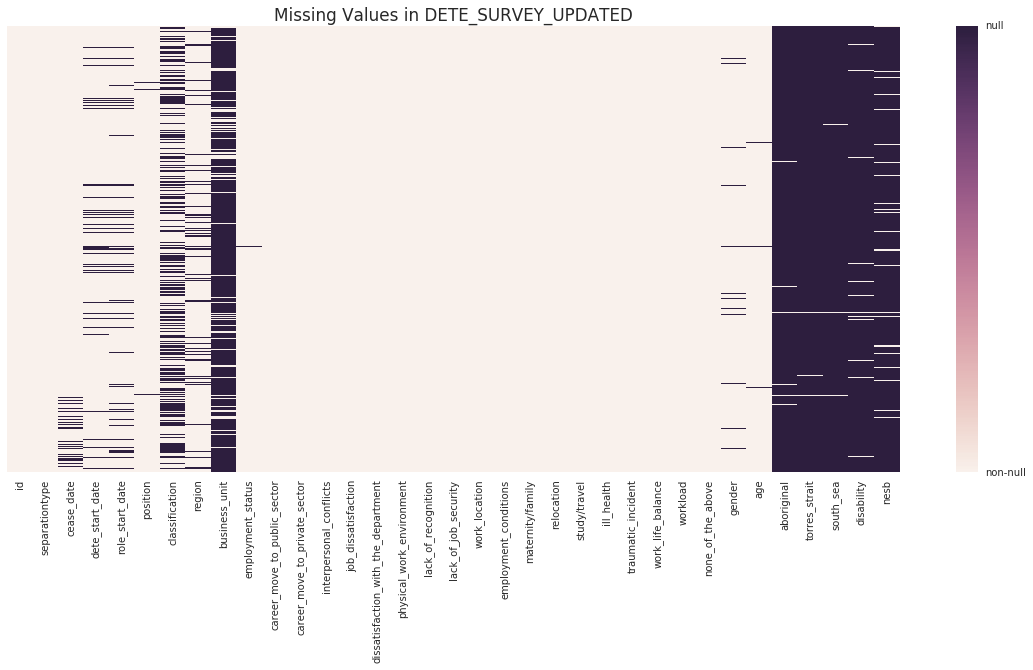

In [17]:
# plotting the heatmap for representing null values in dete_surve_updated dataframe:
fig, ax = plt.subplots(figsize=(20, 8)) 
ax=sns.heatmap(dete_survey_updated.isnull(), cbar=True)
sns.set(font_scale=1.4)
#customizing the colorbar
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['non-null', 'null'])
ax.tick_params(left=False, labelleft=False)
ax.set_title('Missing Values in DETE_SURVEY_UPDATED')
plt.show()


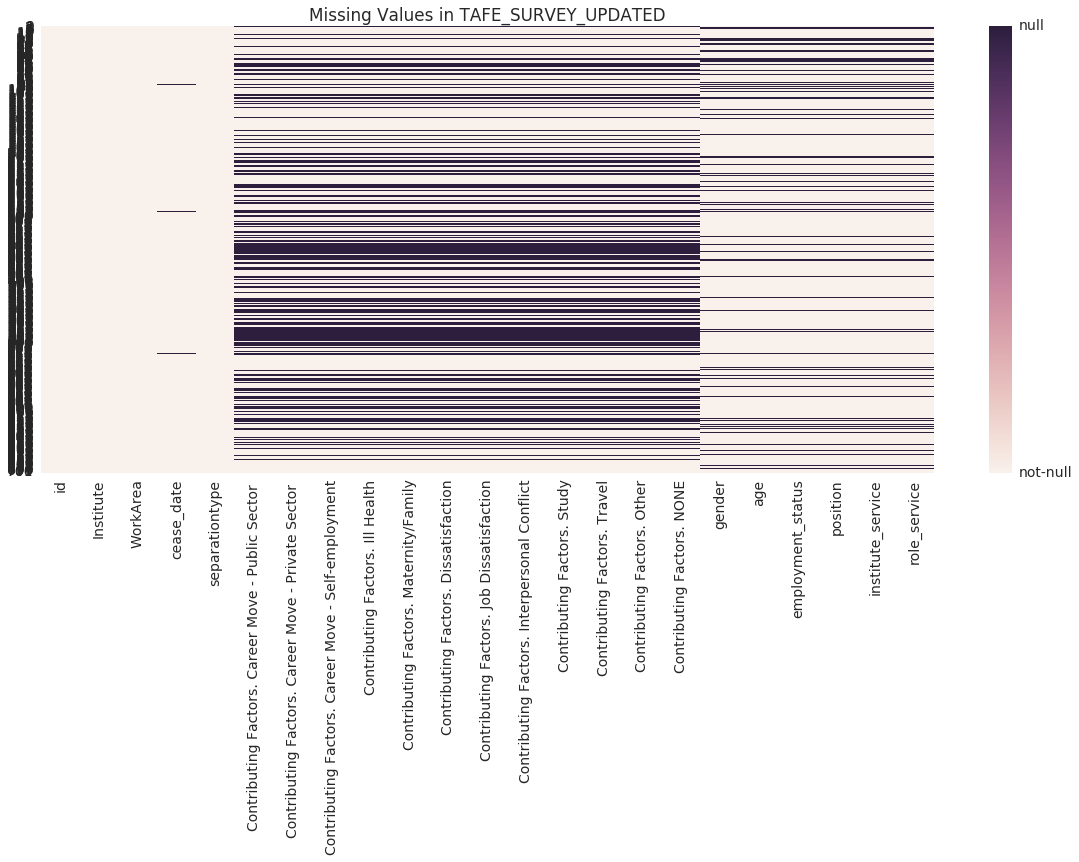

In [18]:
# plotting the heatmap for representing null values in tafe_surve_updated dataframe:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.4)
ax=sns.heatmap(tafe_survey_updated.isnull(),cbar=True)
# customizing the colorbar
cbar=ax.collections[0].colorbar
cbar.set_ticks([0,1])
cbar.set_ticklabels(['not-null','null'])
ax.set_title('Missing Values in TAFE_SURVEY_UPDATED')
plt.show()


### From step 4 we can conclude that:

#### In DETE_SURVEY_UPDATED dataframe:

**Maximum Missing_value** are in these columns:                

|Column_names| Missing_values|
|--- | --- |
|Classification | 367|
|Business Unit |696 |
| Aboriginal| 806 |
|Torres Strait| 819 |
| South Sea| 815 |
| Disability |799 |
| NESB | 790 |

But good thing is **No Missing values** in **job_dissatisfaction  and dissatisfaction_with_the_department** (which will be used for our analysis). 

#### In TAFE_SURVEY_UPDATED dataframe:

In the **TAFE survey** data frame the most problematic column in terms of missing data is the `'main_factor'` column followed by all the columns containing the info on other `'Contributing Factors'`. Luckily, the most important column for our analysis, the `'separationtype'` has got almost no missing values.

- Recall that our end goal is to answer the following question:

**Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**



## Step 5- Analysing the data  for knowing the reason for `Resignation`:

**Steps we will use : **

- Separate data according "separationtype" in tafe_survey_updated and dete_survey_updated.

- From both the dataframes we will select only the data for survey respondents who have a Resignation separation type.

- Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate


In [19]:
# using value_counts() function on 'separationtype'column.
dete_separation_reason=dete_survey_updated['separationtype'].value_counts()
dete_separation_reason

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
# fetching data for those people who have resigned.
dete_resignations=dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains('Resignation'),:].copy()
# checking the value_counts for resigned people
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [21]:
# checking in separation column how many people are separated due to "Resignation"
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
tafe_resignations=tafe_survey_updated.loc[tafe_survey_updated['separationtype'].str.contains('Resignation',na=False),:].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


So for now we have fetched those rows in which reason for separation is `"Resignation"` from both the dataframes.

- **tafe_resignations - No. of rows( 340 )**
- **dete_resignations - No. of rows( 311 )** 

We have done these changes because we want to know the **Reason of Resignation** weather it is because of some kind of dissatisfaction or what??

so there are total 311  people who resigned out of which 91 resigned due to other employer, in dete_survey_updated dataframe.

created a new data frame which is only having data for people who have resigned due to some reasons.
in tafe_survey_updated there are 340 people who resigned , so we created a dataframe which is having data for only those  people who resigned and named it as tafe_resignations.

We made these changes because we only want to analyse the data for those people who have resigned.

## Verifying the Dates Containing Columns

Now we are having two new dataframes :
dete_resignations 
tafe_esignations

we will look into dayes columns in hese dataframes for making sure that it doesn't contain any major inconsistencies.
In our dete_resignations dataframes we are having two dates column:
cease_date-cease_date is the last year of the person's employment.
dete_start_date-dete_start_date is the person's first year of employment.

In [23]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [24]:
# Checking for values in `cease_date` columns
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [25]:
# extracting only years from cease_date column.
pattern=r"([1-2][0-9]{3})"
dete_resignations['cease_date']=dete_resignations.loc[:,'cease_date'].str.extract(pattern,expand=False).astype('float',inplace=True)


In [26]:
# calculating  how many resignations are given each year
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [27]:
# checking the value counts for the first year of employment
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

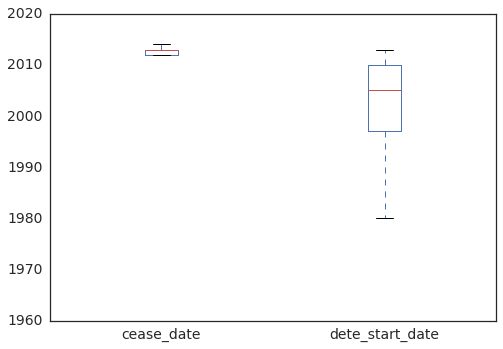

In [28]:
# creating a boxplot for cease_date, dete_start_date column for getting the insights 
# plt.grid(color='white')
sns.set_style('white')
dete_resignations.boxplot(column=['cease_date','dete_start_date'],grid=False)

Now lets look into the tafe_resignations dataframe, and look into it

In [29]:
# counting how many people have resigned each year.
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

From the work we did till now, we can verify:

- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years.

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

So in tafe_resignations we have noticed it already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.
Do we have data that can be used to calculate the length of time the employee spent in their workplace?

Lets look into this:

In [30]:
# fetching institute_service column from tafe_resignations.
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

In [31]:
# we are calculating number of people left the firm in how many years.
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

We are calculting the institute_service in dete_resignations data frames by subtracting from dete_start_date from cease_date.

In [32]:
dete_resignations['institute_service']=dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

we created a new `institute_service` column in `dete_resignations` that we'll use to analyze survey respondents according to their length of employment.Next, we'll identify any employees who resigned because they were dissatisfied.

So now we will check the people who are dissatisfied in both the data frames: 

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

**tafe_survey_updated:**


- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`


**dete_survey_updated:**


- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [33]:
# checking for number of unsatisfied people 'Contributing Factors. Dissatisfaction'
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(),'\n')

# checking for number of unsatisfied people 'Contributing Factors. Job Dissatisfaction'
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64 



-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
# Missing data is represented by '-' we will replace it with np.nan value.
# import numpy as np
# tafe_resignations['Contributing Factors. Dissatisfaction']=tafe_resignations['Contributing Factors. Dissatisfaction'].replace('-',np.nan)
# tafe_resignations['Contributing Factors. Dissatisfaction']

In [35]:
# Function creation for converting values in terms of True and False. 
def update_vals(val):
    if pd.isnull(val)==True:
        return np.nan
    elif val=='-':
        return False
    else:
        return True
    

In [36]:
# applying update_vals function on tafe_resignations datframe 
new_tafe=tafe_resignations.applymap(update_vals).loc[:,['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]
new_tafe.head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


In [37]:
# creating a new column dissatisfied which will represent True if person has resigned due to dissatisfaction else False
tafe_resignations['dissatisfied']=new_tafe.any(axis=1)
# checking in tafe_resignations how many people have resigned due to disatisfaction.
tafe_dissatisfied=tafe_resignations['dissatisfied'].sum()
print('Total no. of dissatisfied people are: ', tafe_dissatisfied)

Total no. of dissatisfied people are:  91


In [38]:
# applying update_vals function on dete_resignations dataframe.
new_dete=dete_resignations.applymap(update_vals).loc[:,['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
new_dete.head()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True,True,True


In [39]:
# In dete_resignations checking how many people are dissatisfied because of some reasons
for i in new_dete.columns:
    print(dete_resignations[i].value_counts(),'\n','----------------------','\n')

False    270
True      41
Name: job_dissatisfaction, dtype: int64 
 ---------------------- 

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64 
 ---------------------- 

False    305
True       6
Name: physical_work_environment, dtype: int64 
 ---------------------- 

False    278
True      33
Name: lack_of_recognition, dtype: int64 
 ---------------------- 

False    297
True      14
Name: lack_of_job_security, dtype: int64 
 ---------------------- 

False    293
True      18
Name: work_location, dtype: int64 
 ---------------------- 

False    288
True      23
Name: employment_conditions, dtype: int64 
 ---------------------- 

False    243
True      68
Name: work_life_balance, dtype: int64 
 ---------------------- 

False    284
True      27
Name: workload, dtype: int64 
 ---------------------- 



In [40]:
# using any function so if person has resigned because of any above reasons then it will return True
dete_resignations['dissatisfied']=new_dete.any(axis=1)
print('Total no. of dissatisfied people are: ',dete_resignations['dissatisfied'].sum())

Total no. of dissatisfied people are:  311


In [41]:
# Lets check how many people have resigned because of dissatisfaction.
dete_dissatisfied=dete_resignations['dissatisfied'].sum()
print('Total dissatisfied peple are: ',dete_dissatisfied)

Total dissatisfied peple are:  311


## Lets conclude what we have done in above steps:

### What we have done :

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way


### Conclusions we made: 

- In **`tafe_resignations`** the people who resigned beacuse of dissatisfaction:
  - `Contributing Factors.Dissaisfaction` - **55**                                                                         
  - `Contributing Factors.Job Dissatisfaction` - **62**                                             
  
Then we have checked in total how many people are disstatisfied in `tafe_resignations`, so if we are getting True in any one of the column(Contributing Factors.Dissaisfaction,Contributing Factors.Job Dissatisfaction) it will be counted as True:

- **Total no. of dissatisfied people(`Tafe_resignations`): 91** 

-------------

- In **`dete_resignations`** the people who resigned because of some kind of dissatisfaction are:
 - `job_dissatisfaction` - **41**
 - `dissatisfaction_with_the_department` - **29**
 - `physical_work_environment` - **6**
 - `lack_of_recognition` - **33**
 - `lack_of_job_security` - **14**
 - `work_location` - **18**
 - `employment_conditions` - **23**
 - ` work_life_balance` - **68**
 - ` workload` - **27**
 
Checked for total number of people dissatisfied in `dete_resignations`:

- **Total no. of dissatisfied people(`dete_resignations`): 311** 

Now, we're finally ready **to combine our datasets!** Our end goal is to aggregate the data according to the **`institute_service`** column, so when you combine the data, think about how to get the data into a form that's easy to aggregate

## Combining both the dataframes for further Analysis :

In [42]:
# copy of dataframe to avoid SettingWithCopy Warning 
dete_resignations_up=dete_resignations.copy()
dete_resignations_up['institute']='DETE'# adding a new column institute in dete_resignations_up 
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE


In [43]:
tafe_resignations_up=tafe_resignations.copy()
tafe_resignations_up['institute']='TAFE'# adding a new column institute in tafe_resignations_up 
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [44]:
# combining both the dataframes by using pd.concat
combined=pd.concat([dete_resignations_up, tafe_resignations_up],ignore_index=True)
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


In [45]:
# drop any columns with less than 500 non null values.
combined_updated=combined.dropna(thresh=500,axis=1)
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,True,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,True,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,True,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


## Lets conclude what we have done so far:

- Creatd new column in both the dataframes:
  
  
  
|Column| Values_assigned|
|-----|-------|
|Tafe_resignations['institute']| 'TAFE'|
|dete_resignations['institute']|'DETE'|



- Combined both the dataframes and assigned it to `combined`.
- Dropped those columns which are having less than 500 non null values.

**Both datframes are combined**                                                                                             
Now we will work on our questions:

- ** Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**



- **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**


## Further analysis on Combined dataframe:

**Lets look at the instiute_service column**

In [46]:
# checking the 'institute_service' column in 'combined_updated' 
x=combined_updated['institute_service'].value_counts()
print(x,'\n')
print('Count of distinct years experience: ',x.shape)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


So as we can see there are **49** distinct values in in which people resigned, lets make it simple:

To analyze the data,** we'll convert these numbers into categories**. We'll base our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- **New: Less than 3 years at a company**
- **Experienced: 3-6 years at a company**
- **Established: 7-10 years at a company**
- **Veteran: 11 or more years at a company**     


**Let's categorize the values in the    `institute_service`    column using the definitions above.**

In [47]:
# From institute service column only extracted numbers.
combined_up=combined_updated.copy()
combined_up['institute_service']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)',expand=False).astype('float')
combined_up['institute_service']

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
       ... 
621     1.0
622     3.0
623     5.0
624     NaN
625     NaN
626     3.0
627     NaN
628     1.0
629     1.0
630     1.0
631     1.0
632     3.0
633     1.0
634     1.0
635     1.0
636     1.0
637     3.0
638     1.0
639     5.0
640     5.0
641     1.0
642     NaN
643     3.0
644     1.0
645     NaN
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

we'll map each value to one of the career stage definitions above.
Create a function that maps each year value to one of the career stages above.


In [48]:
# created a function for converting numbers into categories.
def career_stage(val):
    if val < 3:
        return 'New'
    elif val>=3 and val<=6:
        return 'Experienced'
    elif val>=7 and val<=10:
        return 'Established'
    elif val>=11:
        return 'Veteran'
    elif pd.isnull(val)==True:
        return np.nan

In [67]:
# applied the function on the institute service column 
combined_up['service_cat']=combined_up['institute_service'].apply(career_stage)
combined_up['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

###  What is done in above step:

- Checking the data arrording to `institute_service` column.
- since there where 49 different years of experience it was a bit complex .
-  converted those numbers into categories.
**categories are:**

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

### Conclusions:

|Experience|No. of people|
|--------|----------|
|New  | 193|
|Experienced |172|
|Veteran | 136 |
|Established |62 |

From the table we can conclude that **The maximum people who REsigned are New.**

**Lets calculate the percentage of dissatisfied people in each category .**

In [69]:
combined_up['dissatisfied'].value_counts()

True     402
False    249
Name: dissatisfied, dtype: int64

In [51]:
# aggregating the data according to service_cat column
dissatisfaction_per_df=pd.pivot_table(combined_up.loc[:,['dissatisfied','institute_service','service_cat']],index='service_cat',aggfunc=np.mean)
dissatisfaction_per_df

,dissatisfied,institute_service
service_cat,,
Established,0.774194,7.870968
Experienced,0.581395,4.040698
New,0.476684,0.968912
Veteran,0.808824,19.183824


In [52]:
dissatisfaction_per_df['dissatisfied']

service_cat
Established    0.774194
Experienced    0.581395
New            0.476684
Veteran        0.808824
Name: dissatisfied, dtype: float64

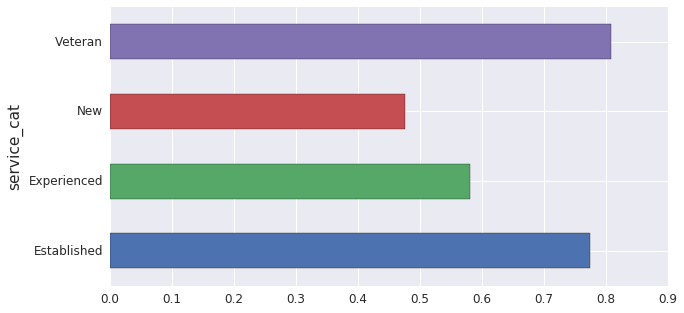

In [60]:
sns.set_style('darkgrid')
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)
# dissatisfaction_per_df['dissatisfied'].plot(kind='bar',grid=False)
dissatisfaction_per_df['dissatisfied'].plot(kind='barh', legend=False, figsize=(10,5), fontsize=12)

- Above, we created a pivot table which calcualtes the percentage of dissatisfied employees for each service category. Afterwards, we plotted the results on a horizontal bar chart.

**So we can conclude that the employees who took the two serveys, Established and Veteran employees are more likely to resign due to dissatisfaction. New employees are least likely to do so**